## Principalele tipuri de tranzactii ale valorilor mobiliare

#### Tranzactionarea pe termen mediu si lung consta in mentinerea in portofoliu a unui titlu minim 3 luni.


<a target="_blank" href="https://colab.research.google.com/github/mhcrnl/jupyter-stock-analysis/blob/main/01_learnBursa.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



Descarc date pentru AAPL de la 2020-01-01 la 2025-01-01...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


TypeError: only length-1 arrays can be converted to Python scalars

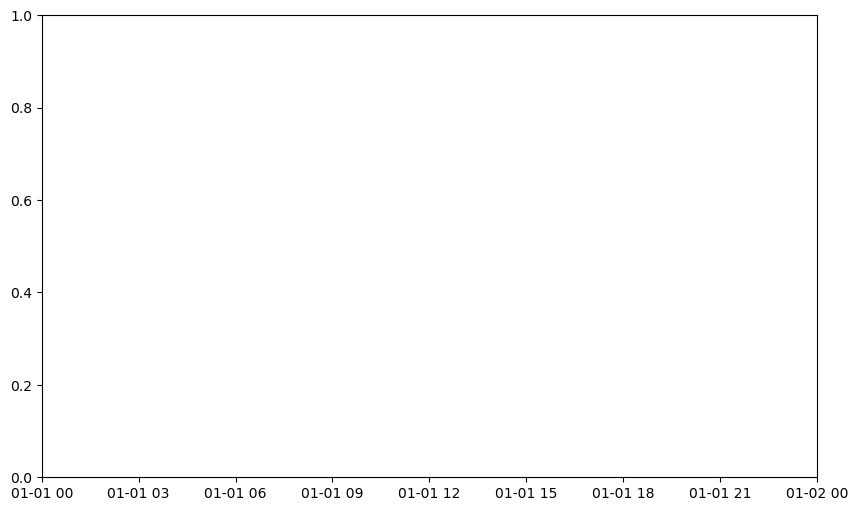

In [1]:
# Pasul 1: Instalează pachetele necesare (dacă nu sunt deja instalate)
#!pip install yfinance pandas matplotlib

# Pasul 2: Importă librăriile necesare
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


# Crearea unei clase pentru analiza acțiunilor
class StockAnalyzer:
    def __init__(self, symbol, start_date, end_date):
        """
        Inițializează obiectul StockAnalyzer cu simbolul acțiunii, perioada de analiză.
        :param symbol: Simbolul acțiunii (ex: AAPL)
        :param start_date: Data de început pentru analiza (ex: '2020-01-01')
        :param end_date: Data de sfârșit pentru analiza (ex: '2025-01-01')
        """
        self.symbol = symbol
        self.start_date = start_date
        self.end_date = end_date
        self.data = None

    def download_data(self):
        """
        Descarcă datele pentru acțiunea specificată folosind yfinance.
        """
        print(f"Descarc date pentru {self.symbol} de la {self.start_date} la {self.end_date}...")
        self.data = yf.download(self.symbol, start=self.start_date, end=self.end_date)

    def plot_closing_price(self):
        """
        Vizualizează prețul de închidere al acțiunii.
        """
        if self.data is None:
            print("Nu există date descărcate. Te rog să descarci datele mai întâi.")
            return
        plt.figure(figsize=(10, 6))
        plt.plot(self.data['Close'], label=f'{self.symbol} Close Price')
        plt.title(f'Evoluția prețului de închidere - {self.symbol}')
        plt.xlabel('Dată')
        plt.ylabel('Preț de închidere (USD)')
        plt.grid(True)
        plt.legend()

    def calculate_moving_averages(self, short_window=50, long_window=200):
        """
        Calculează mediile mobile pe termen scurt și lung (implicit 50 și 200 de zile).
        :param short_window: Fereastra pentru media mobilă pe termen scurt (default: 50 zile)
        :param long_window: Fereastra pentru media mobilă pe termen lung (default: 200 zile)
        """
        if self.data is None:
            print("Nu există date descărcate. Te rog să descarci datele mai întâi.")
            return
        
        self.data['SMA_50'] = self.data['Close'].rolling(window=short_window).mean()
        self.data['SMA_200'] = self.data['Close'].rolling(window=long_window).mean()

        plt.figure(figsize=(10, 6))
        plt.plot(self.data['Close'], label=f'{self.symbol} Close Price', alpha=0.5)
        plt.plot(self.data['SMA_50'], label=f'{short_window}-Day SMA', color='red')
        plt.plot(self.data['SMA_200'], label=f'{long_window}-Day SMA', color='green')
        plt.title(f'Preț de închidere și mediile mobile - {self.symbol}')
        plt.xlabel('Dată')
        plt.ylabel('Preț (USD)')
        plt.grid(True)
        plt.legend()

    def plot_trading_volume(self):
        """
        Vizualizează volumul de tranzacționare al acțiunii.
        """
        if self.data is None:
            print("Nu există date descărcate. Te rog să descarci datele mai întâi.")
            return

        plt.figure(figsize=(10, 6))
        plt.bar(self.data.index, self.data['Volume'], label='Volum de tranzacționare')
        plt.title(f'Volumul de tranzacționare - {self.symbol}')
        plt.xlabel('Dată')
        plt.ylabel('Volum')
        plt.grid(True)
        plt.legend()

    def save_to_pdf(self, filename):
        """
        Salvează toate graficele generate într-un singur fișier PDF.
        :param filename: Numele fișierului PDF (ex: 'analiza_actiuni.pdf')
        """
        with PdfPages(filename) as pdf:
            # Grafic preț de închidere
            self.plot_closing_price()
            pdf.savefig()  # Salvează figura curentă în PDF
            plt.close()  # Închide figura pentru a preveni suprapunerea

            # Grafic medii mobile
            self.calculate_moving_averages()
            pdf.savefig()  # Salvează figura curentă în PDF
            plt.close()

            # Grafic volum de tranzacționare
            self.plot_trading_volume()
            pdf.savefig()  # Salvează figura curentă în PDF
            plt.close()

            print(f"Analiza a fost salvată în fișierul {filename}.")

# Exemplu de utilizare:
if __name__ == "__main__":
    # Inițializează clasa cu simbolul acțiunii și perioada
    analyzer = StockAnalyzer(symbol='AAPL', start_date='2020-01-01', end_date='2025-01-01')
    
    # Descarcă datele
    analyzer.download_data()

    # Salvează analiza într-un fișier PDF
    analyzer.save_to_pdf('analiza_actiuni.pdf')


Descarc date pentru MMM de la 2020-01-01 la 2025-05-11 15:30:33.477757...


[*********************100%***********************]  1 of 1 completed


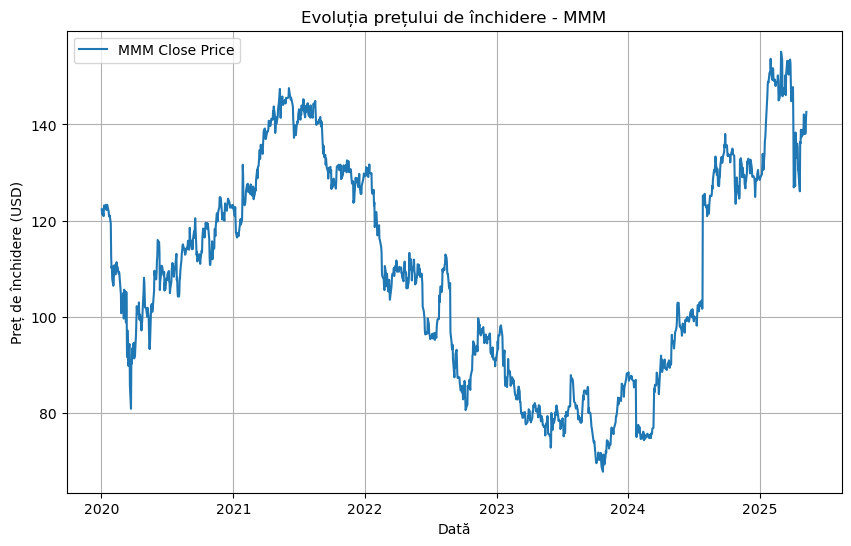

In [2]:
import datetime as dt
import time
import calendar

symbol = "MMM"
start_date = "2020-01-01"
end_date = dt.datetime.now()

mmm = StockAnalyzer(symbol, start_date, end_date)
mmm.download_data()
mmm.plot_closing_price()

Descarc date pentru MMM de la 2020-01-01 la 2025-01-18 10:41:50.231054...


[*********************100%***********************]  1 of 1 completed


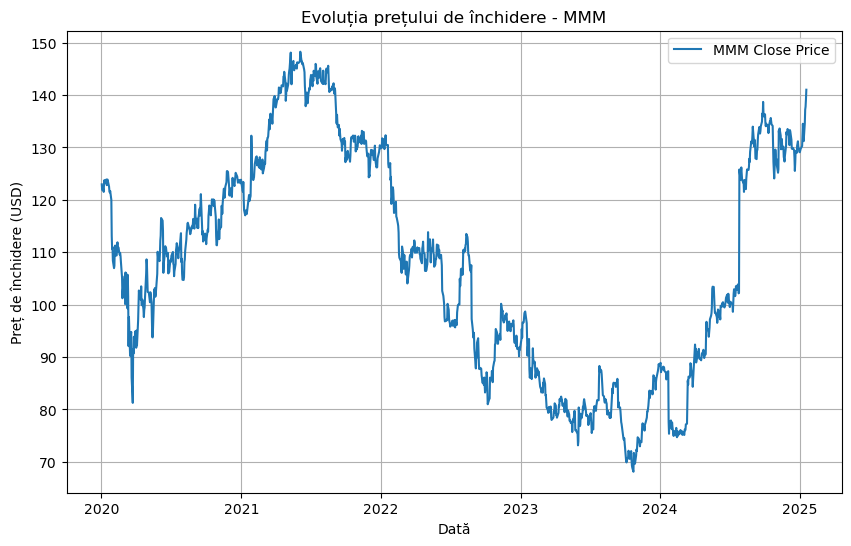

In [13]:
import datetime as dt
import time
import calendar

symbol = "MMM"
start_date = "2020-01-01"
end_date = dt.datetime.now()

mmm = StockAnalyzer(symbol, start_date, end_date)
mmm.download_data()
mmm.plot_closing_price()

Descarc date pentru MMM de la 2020-01-01 la 2025-01-18 10:41:50.231054...


[*********************100%***********************]  1 of 1 completed


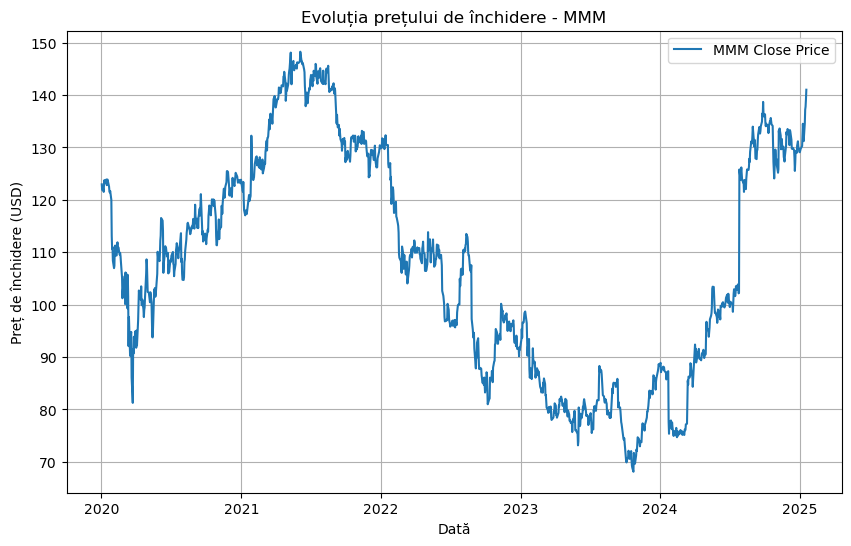

In [13]:
import datetime as dt
import time
import calendar

symbol = "MMM"
start_date = "2020-01-01"
end_date = dt.datetime.now()

mmm = StockAnalyzer(symbol, start_date, end_date)
mmm.download_data()
mmm.plot_closing_price()

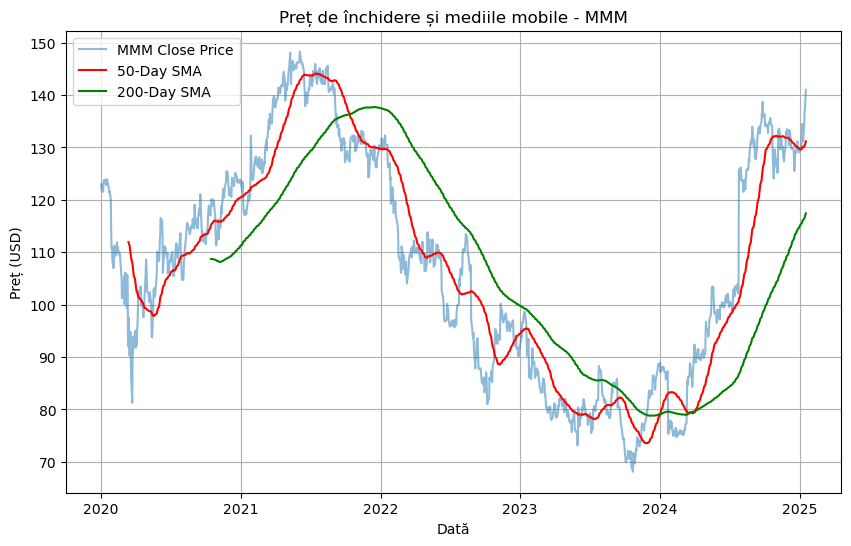

In [18]:
mmm.calculate_moving_averages()

Descarc date pentru AAPL de la 2020-01-01 la 2025-01-01...


[*********************100%***********************]  1 of 1 completed


TypeError: only length-1 arrays can be converted to Python scalars

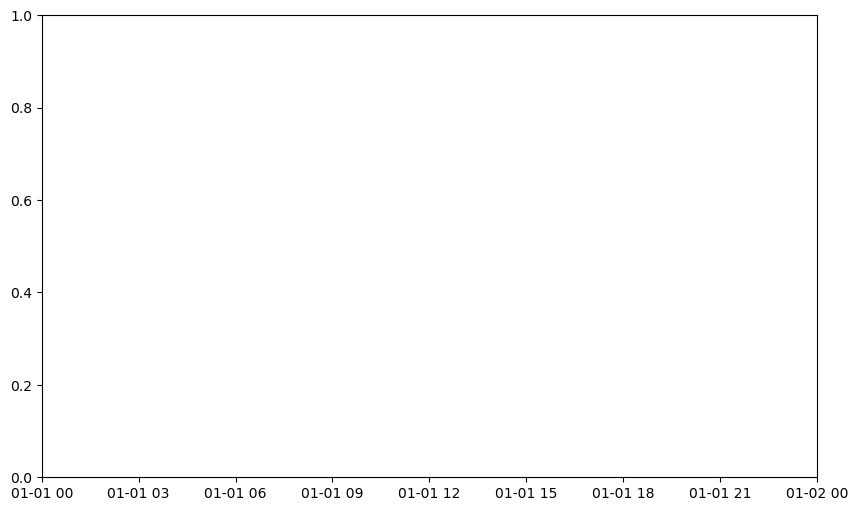

In [4]:
# Pasul 1: Instalează pachetele necesare (dacă nu sunt deja instalate)
!pip install yfinance pandas matplotlib

# Pasul 2: Importă librăriile necesare
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Crearea unei clase pentru analiza acțiunilor
class StockAnalyzer:
    def __init__(self, symbol, start_date, end_date):
        """
        Inițializează obiectul StockAnalyzer cu simbolul acțiunii, perioada de analiză.
        :param symbol: Simbolul acțiunii (ex: AAPL)
        :param start_date: Data de început pentru analiza (ex: '2020-01-01')
        :param end_date: Data de sfârșit pentru analiza (ex: '2025-01-01')
        """
        self.symbol = symbol
        self.start_date = start_date
        self.end_date = end_date
        self.data = None

    def download_data(self):
        """
        Descarcă datele pentru acțiunea specificată folosind yfinance.
        """
        print(f"Descarc date pentru {self.symbol} de la {self.start_date} la {self.end_date}...")
        self.data = yf.download(self.symbol, start=self.start_date, end=self.end_date)

    def plot_closing_price(self):
        """
        Vizualizează prețul de închidere al acțiunii.
        """
        if self.data is None:
            print("Nu există date descărcate. Te rog să descarci datele mai întâi.")
            return
        plt.figure(figsize=(10, 6))
        plt.plot(self.data['Close'], label=f'{self.symbol} Close Price')
        plt.title(f'Evoluția prețului de închidere - {self.symbol}')
        plt.xlabel('Dată')
        plt.ylabel('Preț de închidere (USD)')
        plt.grid(True)
        plt.legend()

    def calculate_moving_averages(self, short_window=50, long_window=200):
        """
        Calculează mediile mobile pe termen scurt și lung (implicit 50 și 200 de zile).
        :param short_window: Fereastra pentru media mobilă pe termen scurt (default: 50 zile)
        :param long_window: Fereastra pentru media mobilă pe termen lung (default: 200 zile)
        """
        if self.data is None:
            print("Nu există date descărcate. Te rog să descarci datele mai întâi.")
            return
        
        self.data['SMA_50'] = self.data['Close'].rolling(window=short_window).mean()
        self.data['SMA_200'] = self.data['Close'].rolling(window=long_window).mean()

        plt.figure(figsize=(10, 6))
        plt.plot(self.data['Close'], label=f'{self.symbol} Close Price', alpha=0.5)
        plt.plot(self.data['SMA_50'], label=f'{short_window}-Day SMA', color='red')
        plt.plot(self.data['SMA_200'], label=f'{long_window}-Day SMA', color='green')
        plt.title(f'Preț de închidere și mediile mobile - {self.symbol}')
        plt.xlabel('Dată')
        plt.ylabel('Preț (USD)')
        plt.grid(True)
        plt.legend()

    def plot_trading_volume(self):
        """
        Vizualizează volumul de tranzacționare al acțiunii.
        """
        if self.data is None:
            print("Nu există date descărcate. Te rog să descarci datele mai întâi.")
            return

        plt.figure(figsize=(10, 6))
        plt.bar(self.data.index, self.data['Volume'], label='Volum de tranzacționare')
        plt.title(f'Volumul de tranzacționare - {self.symbol}')
        plt.xlabel('Dată')
        plt.ylabel('Volum')
        plt.grid(True)
        plt.legend()

    def calculate_macd(self):
        """
        Calculează și vizualizează indicatorul MACD.
        """
        if self.data is None:
            print("Nu există date descărcate. Te rog să descarci datele mai întâi.")
            return

        # Calculul MACD
        short_ema = self.data['Close'].ewm(span=12, adjust=False).mean()  # EMA pe 12 zile
        long_ema = self.data['Close'].ewm(span=26, adjust=False).mean()  # EMA pe 26 de zile
        self.data['MACD'] = short_ema - long_ema  # Linia MACD
        self.data['Signal Line'] = self.data['MACD'].ewm(span=9, adjust=False).mean()  # Linia de semnal

        # Vizualizarea MACD
        plt.figure(figsize=(10, 6))
        plt.plot(self.data['MACD'], label='MACD', color='blue')
        plt.plot(self.data['Signal Line'], label='Signal Line', color='red')
        plt.bar(self.data.index, self.data['MACD'] - self.data['Signal Line'], label='MACD Histogram', color='green', alpha=0.5)
        plt.title(f'Indicator MACD - {self.symbol}')
        plt.xlabel('Dată')
        plt.ylabel('Valoare MACD')
        plt.grid(True)
        plt.legend()

    def save_to_pdf(self, filename):
        """
        Salvează toate graficele generate într-un singur fișier PDF.
        :param filename: Numele fișierului PDF (ex: 'analiza_actiuni.pdf')
        """
        with PdfPages(filename) as pdf:
            # Grafic preț de închidere
            self.plot_closing_price()
            pdf.savefig()  # Salvează figura curentă în PDF
            plt.close()  # Închide figura pentru a preveni suprapunerea

            # Grafic medii mobile
            self.calculate_moving_averages()
            pdf.savefig()  # Salvează figura curentă în PDF
            plt.close()

            # Grafic volum de tranzacționare
            self.plot_trading_volume()
            pdf.savefig()  # Salvează figura curentă în PDF
            plt.close()

            # Grafic MACD
            self.calculate_macd()
            pdf.savefig()  # Salvează figura curentă în PDF
            plt.close()

            print(f"Analiza a fost salvată în fișierul {filename}.")

# Exemplu de utilizare:
if __name__ == "__main__":
    # Inițializează clasa cu simbolul acțiunii și perioada
    analyzer = StockAnalyzer(symbol='AAPL', start_date='2020-01-01', end_date='2025-01-01')
    
    # Descarcă datele
    analyzer.download_data()

    # Salvează analiza într-un fișier PDF, incluzând MACD
    analyzer.save_to_pdf('analiza_actiuni.pdf')


In [22]:
mmm.calculate_macd()

AttributeError: 'StockAnalyzer' object has no attribute 'calculate_macd'

Descarc date pentru MMM de la 2020-01-01 la 2025-01-18 11:17:36.880527...


[*********************100%***********************]  1 of 1 completed


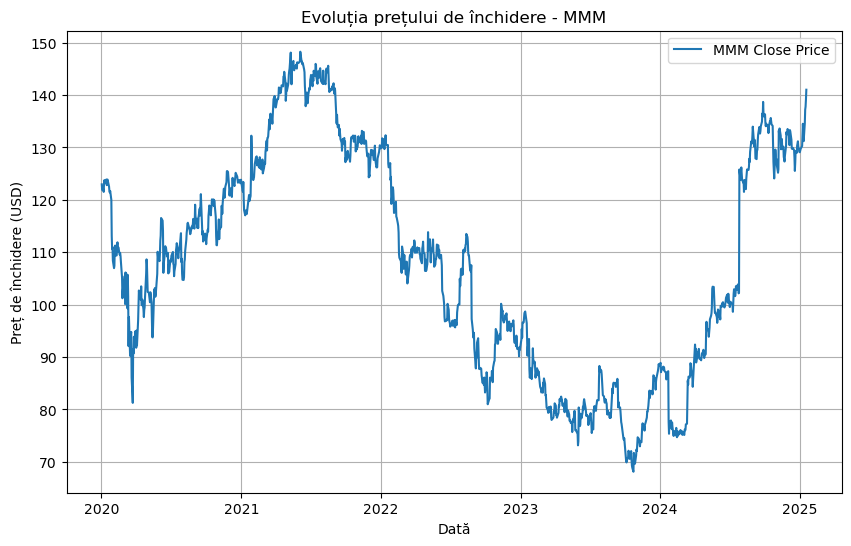

In [10]:
import datetime as dt
import time
import calendar

symbol = "MMM"
start_date = "2020-01-01"
end_date = dt.datetime.now()

mmm = StockAnalyzer(symbol, start_date, end_date)
mmm.download_data()
mmm.plot_closing_price()

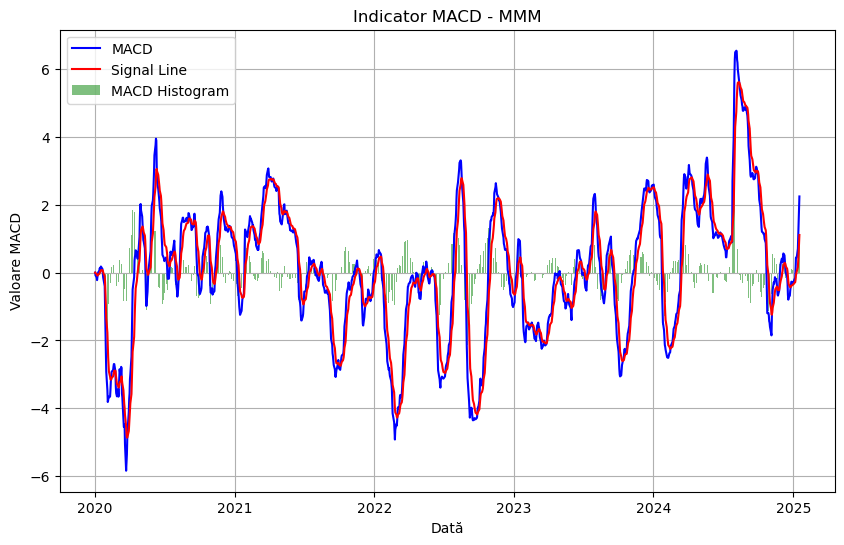

In [11]:
mmm.calculate_macd()

TypeError: only length-1 arrays can be converted to Python scalars

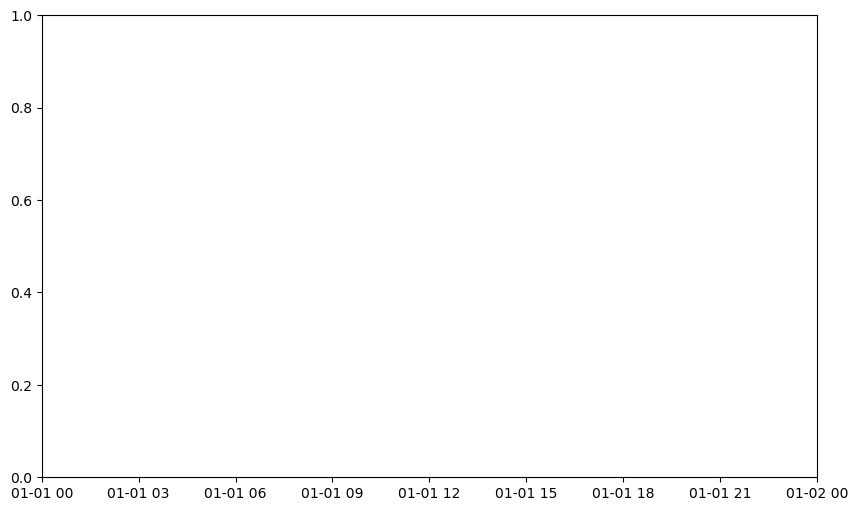

In [14]:
mmm.plot_trading_volume()